Sea $S$ la porción del paraboloide $z=4-x^2-y^2$ limitada entre los planos $z=0$, $y=x$ y $x=0$. Una lámina tiene la forma dada por $S$ y la temperatura en cada punto es proporcional al cuadrado de la distancia al eje OZ. 

Crea un fichero en Python que resuelva los siguientes apartados

(a)  Representar la superficie

Usamos coordenadas esféricas para representar

(b) Encontar la temperatura promedio de la lámina, tomando el valor $k=1$ para la constante de porporcionalidad de la temperatura. 

$$
A= \int \int_S 1 \, dS = \int \int_D \sqrt{1 + (g_x)^2 + (g_y)^2} dx\, dy \mbox{  porque } z=g(x,y)
$$

Haciendo cambio a coordenadas polares $x=r\cos(theta)$,  $y=r\sin(theta)$

$$
Area=\int_0^2 \int_{\pi/4}^{\pi/2} \sqrt{1+4r^2} r d\theta dr
$$

La temperatura total es:

$$
T_{t}= \int \int_S T(x,y,z)dS= \int \int_D T(x,y,z) \sqrt{1 + (g_x)^2 + (g_y)^2} dx\, dy \mbox{  porque } z=g(x,y)
$$

$$
T(x,y,z)= (x-0)^2 + (y-0)^2 + (z-z)^2 = x^2+y^2
$$

Haciendo cambio a coordenadas polares $x=r\cos(\theta)$,  $y=r\sin(\theta)$

$$
T_t= \int_0^2 \int_{\pi/4}^{\pi/2} r^2 \sqrt{1+4r^2} r d\theta dr = \int_0^2 \int_{\pi/4}^{\pi/2} r^3\sqrt{1+4r^2}  d\theta dr 
$$

La temperatura media es:

$$
T_{med}=\frac{T_t}{A}
$$

(c) Determina y representa el lugar geométrico de los puntos de la lámina en los que se alcanza la temperatura promedio


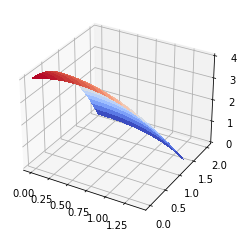

In [1]:
import numpy as np
th=np.linspace(np.pi/4, np.pi/2,10)
r=np.linspace(0,2,20)
Th,R=np.meshgrid(th,r)
X=R*np.cos(Th);Y=R*np.sin(Th)
Z=4-X**2-Y**2

import matplotlib.pyplot as plt
from matplotlib import cm

fig1, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)



#representamos la superficie coloreando según la temperatura
# En la version actual no lo encontre
#fig2, ax = plt.subplots(subplot_kw={"projection": "3d"})
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)



plt.show()

Cálculo del área y la temperatura media


In [2]:
import sympy as sp
x,y=sp.symbols('x,y')
g=4-x**2-y**2
gx=sp.diff(g,x);gy=sp.diff(g,y)

r,t=sp.symbols('r,t')
f=sp.sqrt(1+gx**2+gy**2)
f=sp.simplify(f)

f=f.subs([ (x,r*sp.cos(t)),(y,r*sp.sin(t)) ])
h=f*r
A=sp.integrate(h, (t,sp.pi/4,sp.pi/2), (r,0,2))
print("Area= ", A.evalf())

#Directamente con Scipy
from scipy.integrate import quad
h1=sp.lambdify((t,r),h)
h1=lambda t,r: r*np.sqrt(1+4.*r**2)

from scipy import integrate
A,e= integrate.nquad(h1, [[np.pi/4,np.pi/2], [0,2] ]) 
print("A= ", A)

T=x**2+y**2
F=T*sp.sqrt(1+gx**2+gy**2)
F=F.subs([ (x,r*sp.cos(t)),(y,r*sp.sin(t)) ])
F=sp.simplify(F)
h=F*r
Ttotal=sp.integrate(h, (t,sp.pi/4,sp.pi/2), (r,0,2))
print("Temperatura Total= ", Ttotal.evalf())

#Con Scipy
h1=sp.lambdify((t,r),h)
h1=lambda t,r: r**3*np.sqrt(1+4.*r**2)
Ttotal,e= integrate.nquad(h1, [[np.pi/4,np.pi/2], [0,2] ]) 
print("Temp total = ", Ttotal)


Tmed= Ttotal/A
print("Temperatura media= ", Tmed)



Area=  4.52211289967643
A=  4.522112899676424
Temperatura Total=  10.5579393019353
Temp total =  10.55793930193527
Temperatura media=  2.334735893632982


In [23]:
#c)
#Esto no es, porque lo que me piden es que represente la curva de nivel, la isoterma
import scipy.optimize as opt
from scipy.optimize import fsolve
def f(r,theta): 
    x=r*np.cos(theta);y=r*np.sin(theta)
    return (x**2+y**2)- Tmed

roots=opt.fsolve(f, 1, np.pi/4,xtol=1.49012e-12)
print(roots)


[1.52798426]


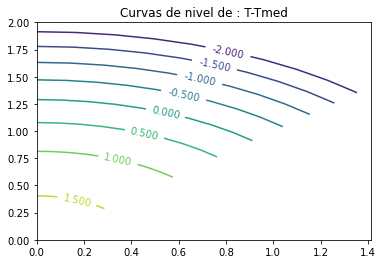

In [30]:
th=np.linspace(np.pi/4, np.pi/2,10)
r=np.linspace(0,2,20)
Th,R=np.meshgrid(th,r)
X=R*np.cos(Th);Y=R*np.sin(Th)
Z=4-X**2-Y**2 - Tmed   #Los puntos son los que están en la curva de nivel marcada con "0"


fig,ax =  plt.subplots()

cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True, 
          fontsize=10)
ax.set_title("Curvas de nivel de : T-Tmed")
plt.show()

